## Decision Trees
This is the implemention of one of the most widely used models for ensemble training which are Decision Trees and Random Forests. We here show the different parameters that we can for both of them and how it affects the weights training.These models being so good are widely used but they themselves have their pros and cons like the Decision Tree model if trained for huge depths could make the model complex and hence we could overfit the data.This type of problem can be easily tackled by using the Random Forest Model where we train huge amounts of decision trees and hence take their average to produce varied models and hence could get better generalization accuracy.We also do not need to standardize the data for these model training as they perform respective classification on each node and hence different nodes are not affected henceforth by the weight parameter.

Here We have also used the required modeules from the libraries to implement the models. We have used the preprocessing module to preprocess the data and hence make it more better for training the model on it.We have also showed the different measures of accuracy parameter to use in the model training like the Gini Impiruty, Entropy Measure and Error and hence shown which one is the best among them for which purpose and how well they measure the Impurity Index.

We have also trained both the Decision Trees and Random Forest Model on the dataset to show how they measure on the dataset and how well they generalize and how well they perform and hence plotted the acquired decision boundaries.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from Decision_Boundary import plot_decision_boundary

### Preprocessing the Data

In [29]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
sc = StandardScaler()
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state = 1,stratify=y)

### Impurity Measure
Different Impurity measure showed by using the different indexs.

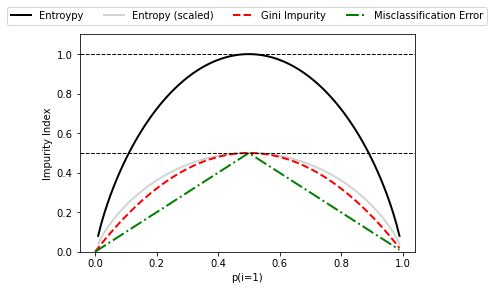

In [31]:
def gini(p):
    return (p)*(1-(p)) + (1-p)*(1 - (1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1 - np.max([p,1-p])

x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i,lab,ls,c in zip([ent,sc_ent,gini(x),err],
                      ['Entroypy','Entropy (scaled)','Gini Impurity','Misclassification Error'],
                      ['-','-','--','-.'],
                      ['black','lightgray','red','green','cyan']):
    line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color = c)

ax.legend(loc = 'upper center',bbox_to_anchor = (0.5,1.15),
          ncol =5,fancybox = True,shadow = False)
ax.axhline(y=0.5,linewidth = 1,color = 'k',linestyle = '--')
ax.axhline(y=1.0,linewidth = 1,color = 'k',linestyle = '--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### Decision Tree Model

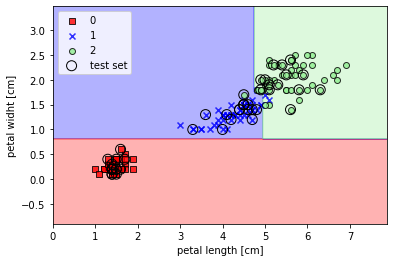

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini',max_depth = 4,random_state =1)
tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier = tree,test_idx = range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal widht [cm]')
plt.legend(loc = 'upper left')
plt.show()

### Visualization of Tree using Graphviz
Here we have used the required libraries to visualize the model that has been built by the decision tree for the classification by using the required modules like graphviz and pydotplus

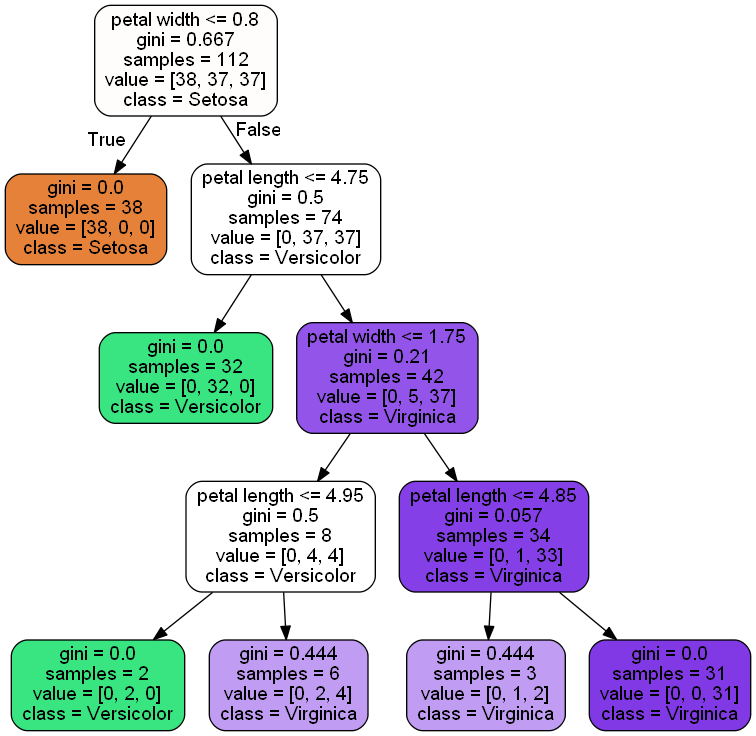

In [36]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from PIL import Image
from IPython.display import display
dot_data = export_graphviz(tree,
                           filled = True,
                           rounded = True,
                           class_names = ['Setosa',
                                          'Versicolor',
                                          'Virginica'],
                           feature_names = ['petal length',
                                             'petal width'],
                           out_file = None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
img = Image.open('tree.png')
display(img)

### Random Forest Model

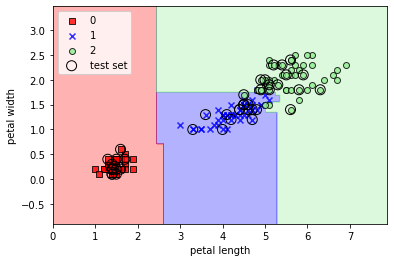

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini',n_estimators = 11,random_state=1,n_jobs = 2)
forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx = range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()